In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-trig-interp)


We will get a cardinal function without using an explicit formula, just by passing data that is 1 at one node and 0 at the others.

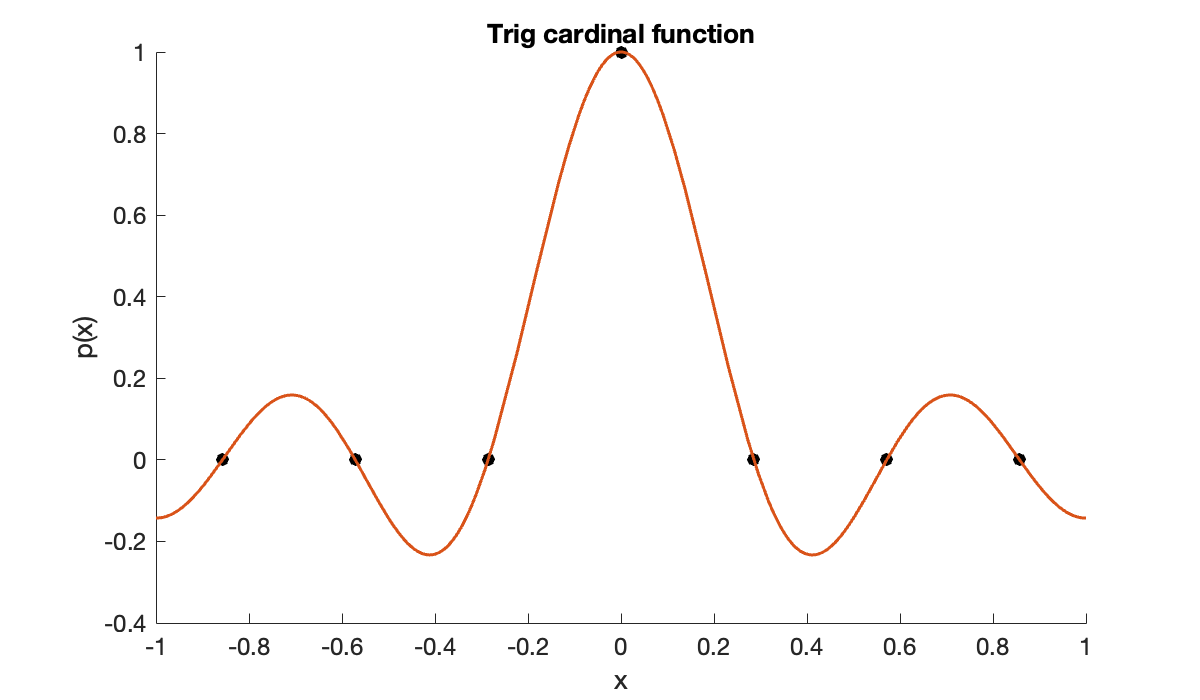

In [2]:
N = 7;  n = (N-1) / 2;
t = 2 * (-n:n)' / N;
y = zeros(N, 1);  y(n+1) = 1;
clf,  scatter(t, y, 'k'),  hold on

p = triginterp(t, y);
fplot(p, [-1, 1])
xlabel('x'),  ylabel('p(x)')   
title('Trig cardinal function')  

Here is a 2-periodic function and one of its interpolants.

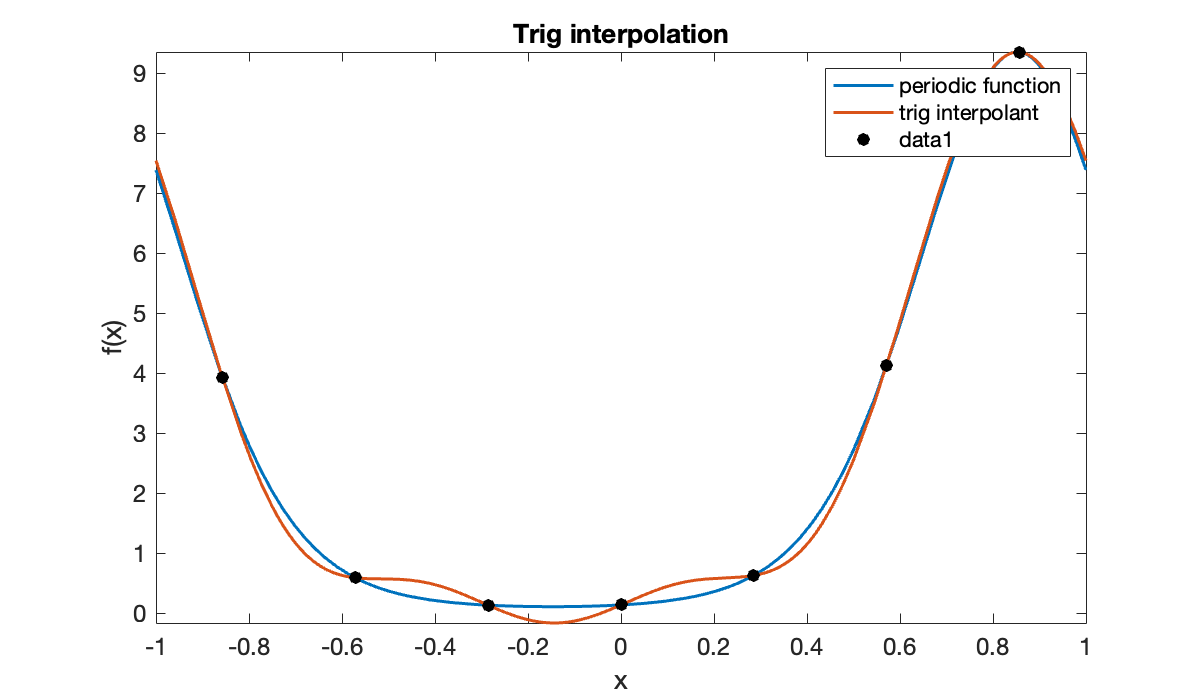

In [3]:
clf
f = @(x) exp( sin(pi*x) - 2 * cos(pi*x) );
fplot(f, [-1, 1], displayname="periodic function"),  hold on
fplot(triginterp(t, f(t)), [-1, 1], displayname="trig interpolant")
y = f(t);  scatter(t, f(t), 'k')
xlabel('x'),  ylabel('f(x)')   
title('Trig interpolation');  legend()    

The convergence of the interpolant is spectral. We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes. Note that when $N$ is even, the value of $n$ is not an integer but works fine for defining the nodes.

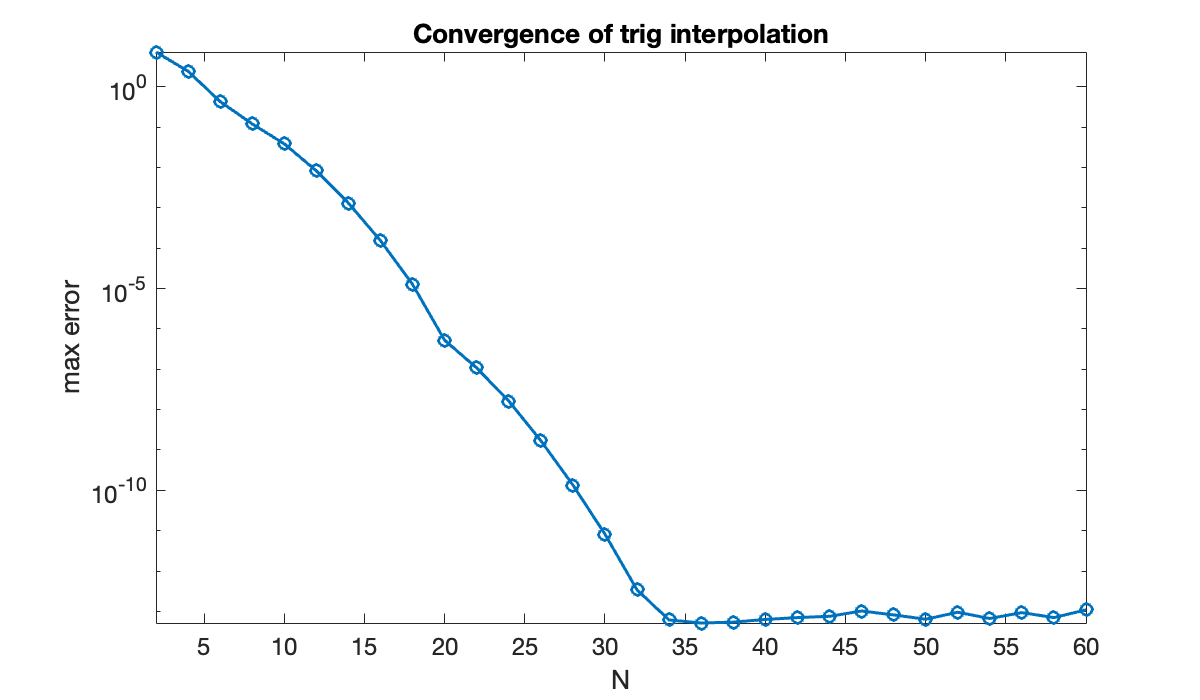

In [4]:
N = 2:2:60;
err = zeros(size(N));
x = linspace(-1, 1, 1601)';  % for measuring error
for k = 1:length(N)
    n = (N(k) - 1) / 2;
    t = 2 * (-n:n)' / N(k);
    p = triginterp(t, f(t));
    err(k) = norm(f(x) - p(x), Inf);
end
clf,  semilogy(N, err, 'o-')
axis tight, title('Convergence of trig interpolation')   
xlabel('N'),  ylabel('max error')   